# Matheus Pereira de Lima Giannini - #34766

In [ ]:
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 8.5 MB/s 
     |████████████████████████████████| 76 kB 4.4 MB/s 
     |████████████████████████████████| 45 kB 1.3 MB/s 
     |████████████████████████████████| 41 kB 351 kB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import uszipcode

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.nunique() # Para saber quantos números repetidos existem 

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [ ]:
df.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


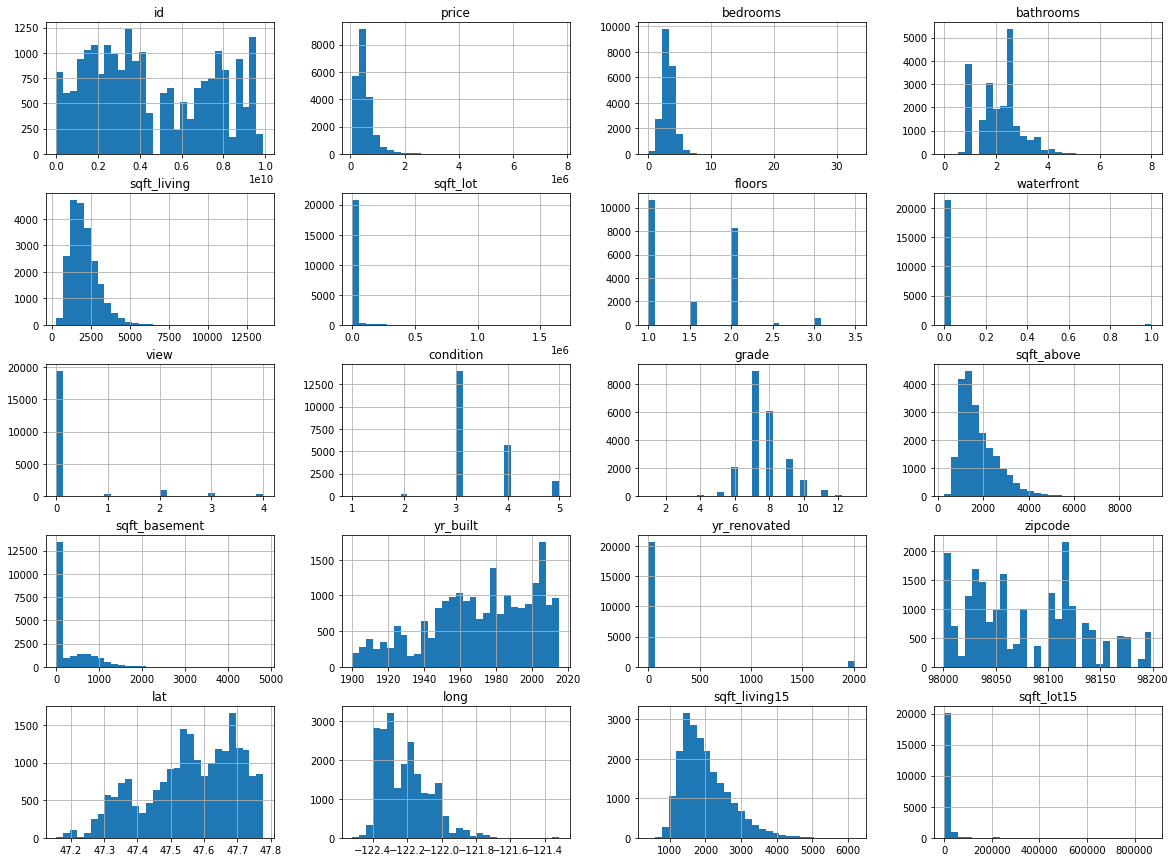

In [ ]:
#Verificar se exite algum 'outliers'
df.hist(bins=30,figsize=(20,15))
plt.show()

Cidade dos imóveis

In [ ]:
# Para entrar o nome da cidade foi utilizado a coluna de zipcode (semelhante ao cep). 
#A biblioteca uszipcode foi utilizada para realizada a transformação de zipcode em nome da cidade

In [ ]:
from uszipcode import SearchEngine

In [ ]:
search = SearchEngine()
df['name_city'] = df['zipcode'].map(lambda x: search.by_zipcode(x).major_city)

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [ ]:
# Agora temos uma coluna a mais, que é a da cidade (city)
df.shape 

(21613, 22)

Calculo do preço por área de imóvel

In [ ]:
df['price_per_area'] = df['price']/df['sqft_living']

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,name_city,price_per_area
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle,188.050847
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle,209.338521
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore,233.766234
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle,308.163265
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish,303.571429


In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                4.580302e+09
price             5.400881e+05
bedrooms          3.370842e+00
bathrooms         2.114757e+00
sqft_living       2.079900e+03
sqft_lot          1.510697e+04
floors            1.494309e+00
waterfront        7.541757e-03
view              2.343034e-01
condition         3.409430e+00
grade             7.656873e+00
sqft_above        1.788391e+03
sqft_basement     2.915090e+02
yr_built          1.971005e+03
yr_renovated      8.440226e+01
zipcode           9.807794e+04
lat               4.756005e+01
long             -1.222139e+02
sqft_living15     1.986552e+03
sqft_lot15        1.276846e+04
price_per_area    2.641566e+02
dtype: float64

Filtro da tabela

In [ ]:
# Antes de fazer os filtros para identiifcar quais imoveis investir, primeiro tem 
# que ser feito uma escolha de quais dados utilizar e qual metrica.

#-> Utilizar a media de price_per_area (Quanto menor for o valor referente a media, melhor ele será).
#-> Utilizar a media sqft_living15 para saber se o imovel é o melhor de uma região.
#-> Como cidade mais populosa do condado é Seattle. Utilizar um filtro para apenas imoveis em Seattle.
#-> Condição da casa é revelante para saber se a casa vai precisar de reforma.Logo, se condition maior ou igual a 3 (condição aceitavel) o imoveis tem boa condição.
#-> A qualidade de material utilizado na construção. Caso grade >= media de grade, os materias da construção está validados.
#-> Se o imovel tiver uma boa vista será um diferencial (view!= 0 é valido).

In [ ]:
# Criação dessa tabela porque a media de Seattle é diferente da media do condado inteiro 
df_se = df[(df["name_city"]=="Seattle")]
df_se.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,name_city,price_per_area
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle,188.050847
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle,209.338521
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle,308.163265
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,0,1963,0,98198,47.4095,-122.315,1650,9711,Seattle,275.330189
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,730,1960,0,98146,47.5123,-122.337,1780,8113,Seattle,128.932584


In [ ]:
df_se.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                4.603246e+09
price             5.349638e+05
bedrooms          3.169433e+00
bathrooms         1.893868e+00
sqft_living       1.795252e+03
sqft_lot          6.454444e+03
floors            1.461234e+00
waterfront        8.131893e-03
view              3.028852e-01
condition         3.438454e+00
grade             7.338755e+00
sqft_above        1.443223e+03
sqft_basement     3.520285e+02
yr_built          1.954970e+03
yr_renovated      1.242979e+02
zipcode           9.813363e+04
lat               4.761343e+01
long             -1.223325e+02
sqft_living15     1.682882e+03
sqft_lot15        6.181085e+03
price_per_area    3.047750e+02
dtype: float64

In [ ]:
df_Filtro1 = df_se[(df_se["price_per_area"]<=df_se["price_per_area"].mean()) & (df_se["sqft_living"]>=df_se["sqft_living15"]) & (df_se["condition"]>3) & (df_se["grade"]>7) & (df_se["view"]>0) & (df_se["price"]<=df_se["price"].mean())]

In [ ]:
df_Filtro1.shape

(16, 23)

In [ ]:
# Depois de todos os filtros agora é saber quais os imoveis mais baratos utilizando price_per_area
df_Filtro1.sort_values(['price_per_area'], ascending=[True])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,name_city,price_per_area
5668,8159300050,20150312T000000,355425.0,4,2.50,3238,9112,1.0,0,2,...,1560,1979,0,98198,47.4005,-122.311,3056,9668,Seattle,109.766831
3606,5072300100,20140718T000000,470000.0,4,2.25,3380,9900,1.0,0,2,...,1690,1969,0,98166,47.4438,-122.340,2390,9900,Seattle,139.053254
19555,3379200100,20140523T000000,334000.0,4,2.50,2210,6080,1.0,0,2,...,800,1965,0,98178,47.4915,-122.228,2210,6175,Seattle,151.131222
16016,7784400130,20140505T000000,497300.0,6,2.75,3200,9200,1.0,0,2,...,1600,1953,0,98146,47.4920,-122.364,2220,9500,Seattle,155.406250
9907,6118600045,20140825T000000,350000.0,4,2.00,2060,13400,1.0,0,2,...,0,1957,0,98166,47.4404,-122.340,1950,10370,Seattle,169.902913
6951,3123049142,20140805T000000,452000.0,3,2.25,2600,14810,1.0,0,2,...,1110,1956,0,98166,47.4326,-122.341,2450,16715,Seattle,173.846154
1634,7129300935,20141105T000000,415000.0,3,1.75,2380,5650,1.0,0,2,...,1190,1956,0,98118,47.5119,-122.255,2350,6554,Seattle,174.369748
9348,7972601445,20150116T000000,465000.0,4,2.25,2550,7650,2.0,0,2,...,0,1996,0,98106,47.5296,-122.342,2550,7650,Seattle,182.352941
11385,9536601331,20140722T000000,420000.0,4,2.00,2280,10319,1.0,0,3,...,1010,1989,0,98198,47.3594,-122.322,2280,9767,Seattle,184.210526
6162,4197400005,20140620T000000,455000.0,4,2.25,2450,21000,1.0,0,2,...,800,1954,0,98166,47.4559,-122.344,1820,12480,Seattle,185.714286


In [ ]:
# Os 5 imoveis que a empresa deve investir:8159300050,5072300100,3379200100,7784400130 e 6118600045
# Esses são os ID's dos imoveis que passaram pelas filtros citados anteriores.

In [ ]:
# Para os imoveis que não deve ser investido os filtros serão opostos aos dos imoveis para investir 

In [ ]:
df_Filtro2 = df[(df["price_per_area"]>=df["price_per_area"].mean()) & (df["sqft_living"]<=df["sqft_living15"]) & (df["condition"]<3) & (df["grade"]<=7) & (df["view"]==0) & (df["price"]>=df["price"].mean())]

In [ ]:
df_Filtro2.shape

(6, 23)

In [ ]:
df_Filtro2.sort_values(['price_per_area'], ascending=[False])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,name_city,price_per_area
5556,4083802195,20150319T000000,578888.0,2,2.00,1060,4000,1.0,0,0,...,60,1914,0,98103,47.6626,-122.337,1310,4000,Seattle,546.120755
4085,6888900115,20150216T000000,555750.0,3,1.00,1060,4880,1.0,0,0,...,150,1913,0,98118,47.5545,-122.288,1200,4880,Seattle,524.292453
13706,7550800736,20150506T000000,600000.0,2,1.75,1180,5000,1.0,0,0,...,300,1925,0,98107,47.6749,-122.398,1470,5000,Seattle,508.474576
8232,3885808035,20150316T000000,619500.0,6,1.50,1680,5202,1.5,0,0,...,0,1911,0,98033,47.6798,-122.206,1890,5500,Kirkland,368.750000
9721,2568300045,20150319T000000,649950.0,6,2.00,1900,8240,1.0,0,0,...,700,1964,0,98125,47.7037,-122.296,1900,8240,Seattle,342.078947
36,9435300030,20140528T000000,550000.0,4,1.00,1660,34848,1.0,0,0,...,730,1933,0,98052,47.6621,-122.132,2160,11467,Redmond,331.325301


In [ ]:
# Os 5 imoveis para não investir: 4083802195,6888900115,7550800736,3885808035 e 2568300045